In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    lt = np.dot(tx.T, tx)
    rt = np.dot(tx.T, y)
    # solve seems to work better than inv?
    opt_weights = np.linalg.solve(lt, rt)
    return opt_weights

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
from grid_search import *
from costs import compute_mse
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)

    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=10)

    # Start the grid search
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)

    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)

    # Print the results
    print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}".format(
          l=loss_star, w0=w0_star, w1=w1_star))
    
    # least squares
    ls_w = least_squares(y, tx)
    ls_loss = compute_mse(y, tx, ls_w)
    print("Least Squares: loss*={l}, w0*={w0}, w1*={w1}".format(
          l=ls_loss, w0=ls_w[0], w1=ls_w[1]))

Test it here

In [4]:
test_your_least_squares()

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686
Least Squares: loss*=15.3858878688294, w0*=73.29392200210505, w1*=13.479712434989228


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [6]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = np.zeros((len(x), degree + 1))
    for i in range(0, degree + 1):
        poly[:, i] = np.power(x, i)
    return poly

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [7]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        poly = build_poly(x, degree)
        
        weights = least_squares(y, poly)
        mse = compute_mse(y, poly, weights)
        rmse = np.sqrt(2 * mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907552
Processing 4th experiment, degree=12, rmse=0.24328247481248672


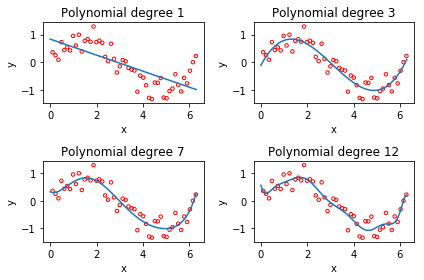

In [8]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [9]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    indices = np.random.permutation(len(x))
    tr_end_idx = int(len(x) * ratio)
    # split dataset
    x_tr = x[:tr_end_idx]
    x_te = x[tr_end_idx:]
    y_tr = y[:tr_end_idx]
    y_te = y[tr_end_idx:]
    return x_tr, x_te, y_tr, y_te

Then, test your `split_data` function below.

In [10]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # split the data, and return train and test data
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    
    # form train and test data with polynomial basis function
    x_tr = build_poly(x_tr, degree)
    x_te = build_poly(x_te, degree)
    
    # calcualte weight through least square
    weights = least_squares(y_tr, x_tr)

    # calculate RMSE for train and test data
    mse_tr = compute_mse(y_tr, x_tr, weights)
    mse_te = compute_mse(y_te, x_te, weights)
    rmse_tr = np.sqrt(2 * mse_tr)
    rmse_te = np.sqrt(2 * mse_te)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [11]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.488, Testing RMSE=0.296
proportion=0.9, degree=3, Training RMSE=0.266, Testing RMSE=0.194
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.186
proportion=0.9, degree=12, Training RMSE=0.250, Testing RMSE=0.169
proportion=0.5, degree=1, Training RMSE=0.458, Testing RMSE=0.547
proportion=0.5, degree=3, Training RMSE=0.261, Testing RMSE=0.267
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.313
proportion=0.5, degree=12, Training RMSE=0.173, Testing RMSE=0.395
proportion=0.1, degree=1, Training RMSE=0.597, Testing RMSE=0.497
proportion=0.1, degree=3, Training RMSE=0.027, Testing RMSE=0.447
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=5.309
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=39.964


# 3 Ridge Regression
Please fill in the function below.

In [12]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    reg = 2 * len(tx) * lambda_ * np.identity(tx.shape[1])
    lt = np.dot(tx.T, tx) + reg
    rt = np.dot(tx.T, y)
    # solve seems to work better than inv?
    opt_weights = np.linalg.solve(lt, rt)
    return opt_weights

In [13]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # split the data
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    
    # form train and test data with polynomial basis function
    x_tr = build_poly(x_tr, degree)
    x_te = build_poly(x_te, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # calcualte weight through least square
        weights = ridge_regression(y_tr, x_tr, lambda_)

        # calculate RMSE for train and test data
        mse_tr = compute_mse(y_tr, x_tr, weights)
        mse_te = compute_mse(y_te, x_te, weights)
        rmse_tr.append(np.sqrt(2 * mse_tr))
        rmse_te.append(np.sqrt(2 * mse_te))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.233, Testing RMSE=0.303
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.235, Testing RMSE=0.296
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.238, Testing RMSE=0.288
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.242, Testing RMSE=0.282
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.245, Testing RMSE=0.279
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.247, Testing RMSE=0.277
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.248, Testing RMSE=0.275
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.249, Testing RMSE=0.274
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.250, Testing RMSE=0.272
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.251, Testing RMSE=0.269
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.256, Testing RMSE=0.266
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.268, Testing RMSE=0.268
proportion=0.5, degree=7, lambda=0.193, 

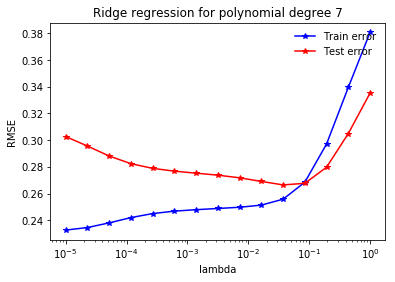

In [14]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)
# best Testing RMSE=0.266 when lambda=0.037
# better than the case without lambda (lambda=0, without regularization term)